<a href="https://colab.research.google.com/github/VictorOmondi1997/visualizing_UDoE_data/blob/master/visualizing_UDoE_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing US Department of Education Data

Looking at the College Scorecard Data from the US Department of Education. 

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [16]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,MEDIAN_HH_INC,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,14600,49720.22,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,14250,55735.22,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,11082,53683.7,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,15000,58688.62,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,15274,46065.2,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


# regression plot for Tuition

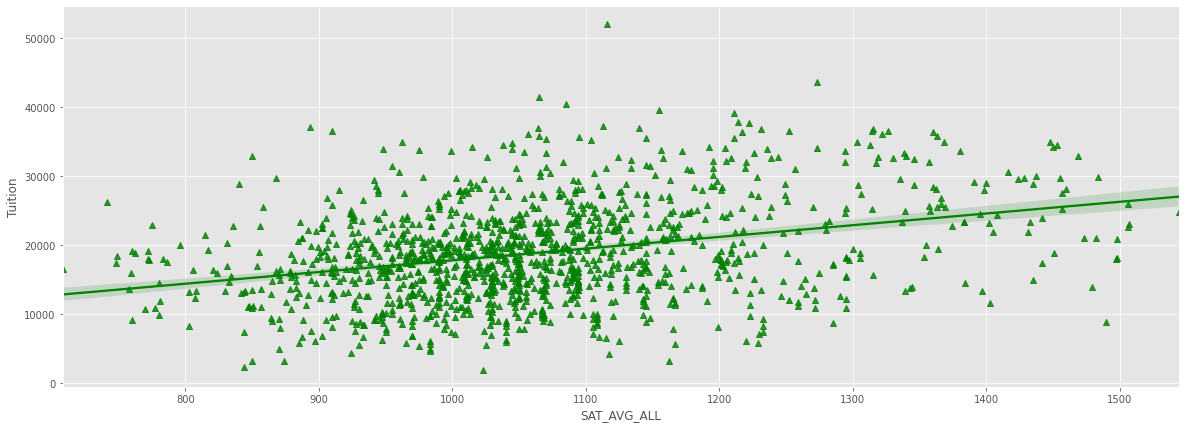

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
sns.regplot(data=df, ax=ax, y='Tuition', x="SAT_AVG_ALL", marker='^', color='g')

plt.show()

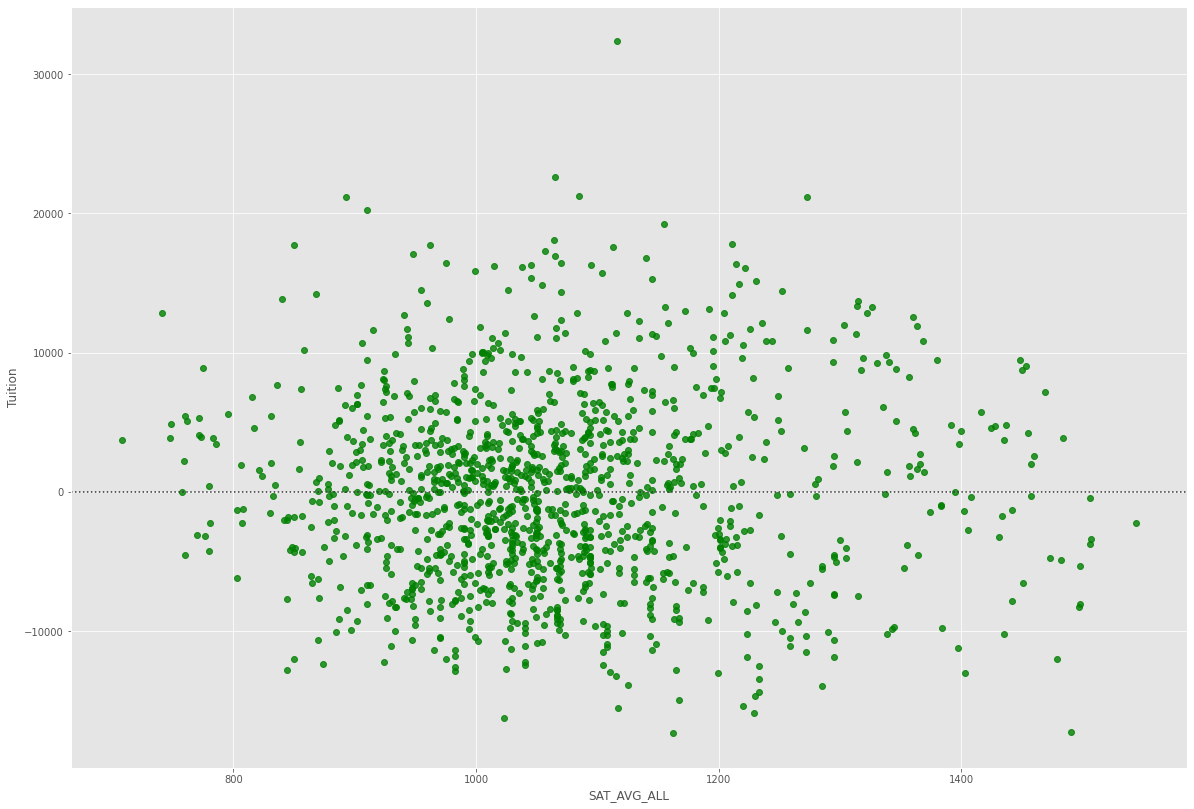

In [18]:
fig, ax = plt.subplots(figsize=(20,14))
sns.residplot(data=df, ax=ax, y='Tuition', x="SAT_AVG_ALL", color='g')

plt.show()

There does appear to be a linear relationship between tuition and SAT scores.

# Regression plot of Tuition and the Percentage of Pell Grants

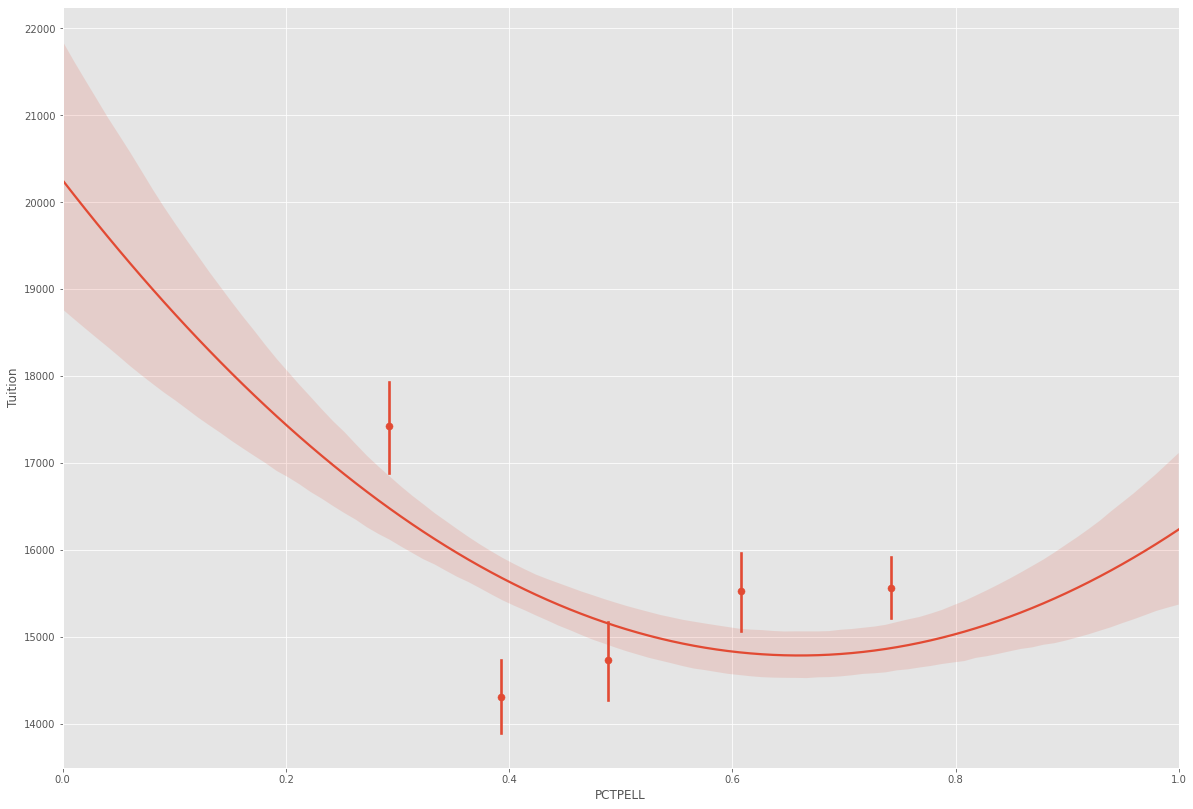

In [19]:
fig, ax = plt.subplots(figsize=(20,14))
sns.regplot(data=df, x='PCTPELL', y='Tuition', ax=ax, x_bins=5, order=2)
plt.show()

# the relationship between tuition and the Undergraduate population abbreviated as UG in this data. 

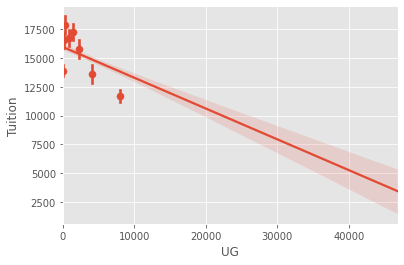

In [20]:
sns.regplot(data=df, x='UG', y='Tuition', x_bins=8)

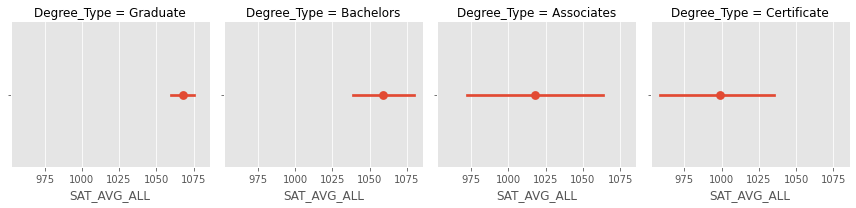

In [23]:
g= sns.FacetGrid(data=df, col='Degree_Type', col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])
g.map(sns.pointplot, 'SAT_AVG_ALL', order=[1,2,3,4])
plt.show()

This plots tell us a lot about the relationships between Average SAT scores by Degree Types offered at a university.

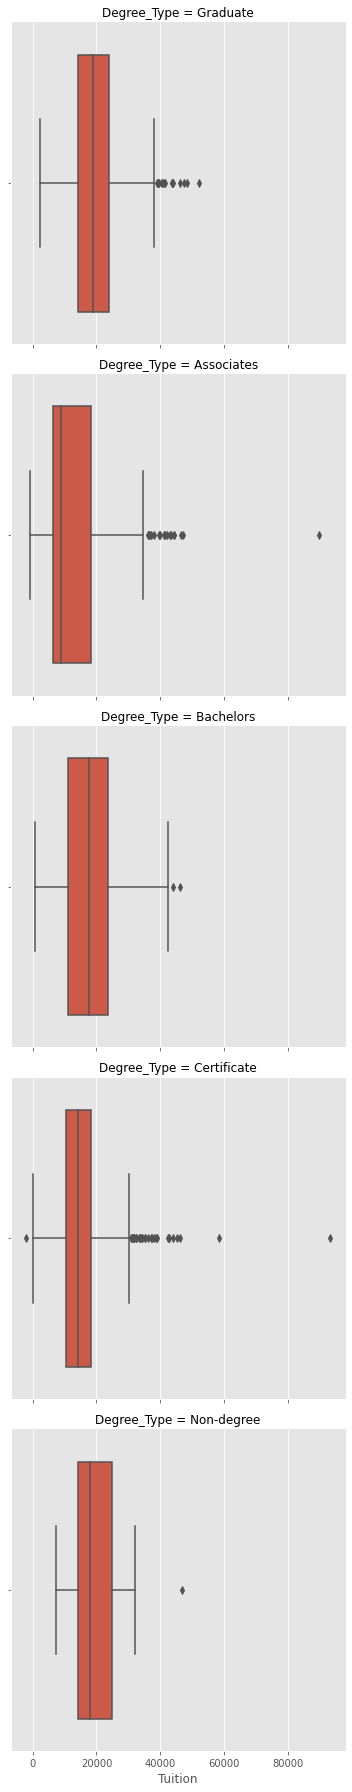

In [26]:
sns.catplot(data=df, x='Tuition', kind='box', row='Degree_Type')
plt.show()

# pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 

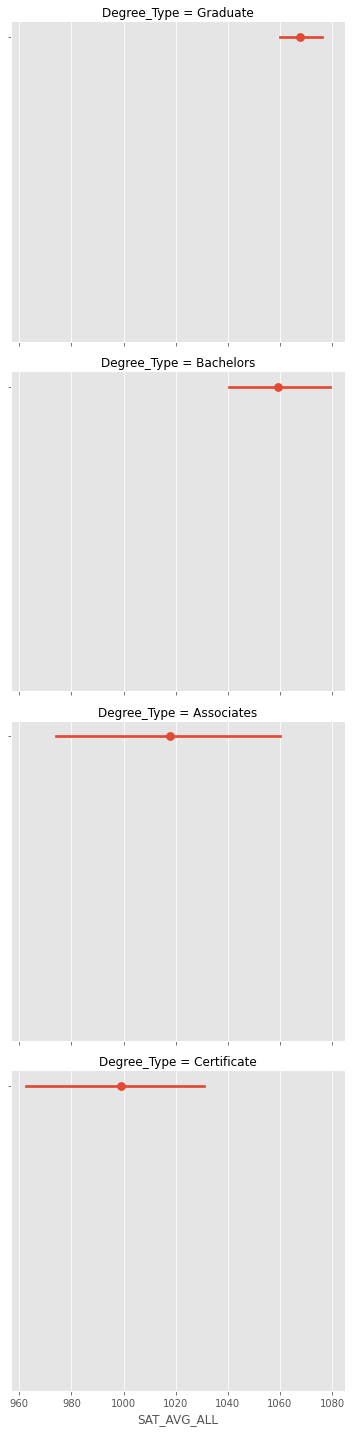

In [27]:

sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()

Looking at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

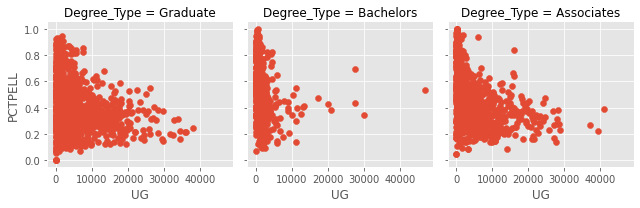

In [28]:
g = sns.FacetGrid(df, col='Degree_Type', col_order=['Graduate', 'Bachelors', 'Associates'])
g.map(plt.scatter, 'UG', 'PCTPELL')
plt.show()

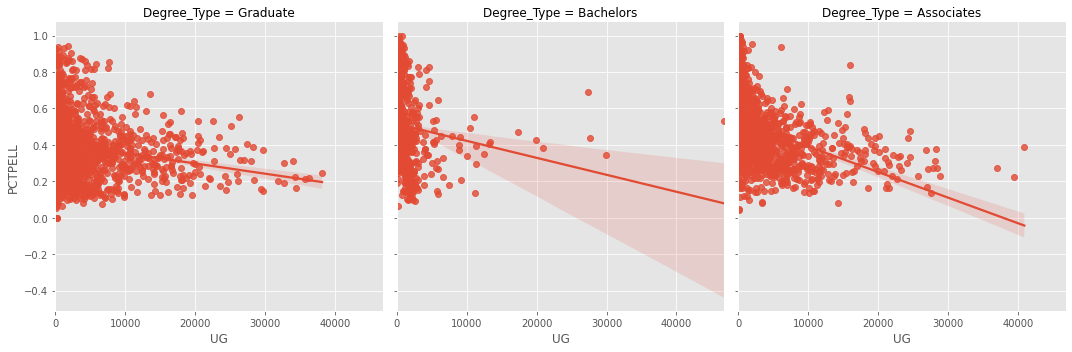

In [29]:
sns.lmplot(data=df, x='UG', y='PCTPELL', col='Degree_Type', col_order=['Graduate', 'Bachelors', 'Associates'])
plt.show()


# comparing "SATAVGALL" to "Tuition" with columns varying by "Ownership" and rows by "Degree_Type".

Looking at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

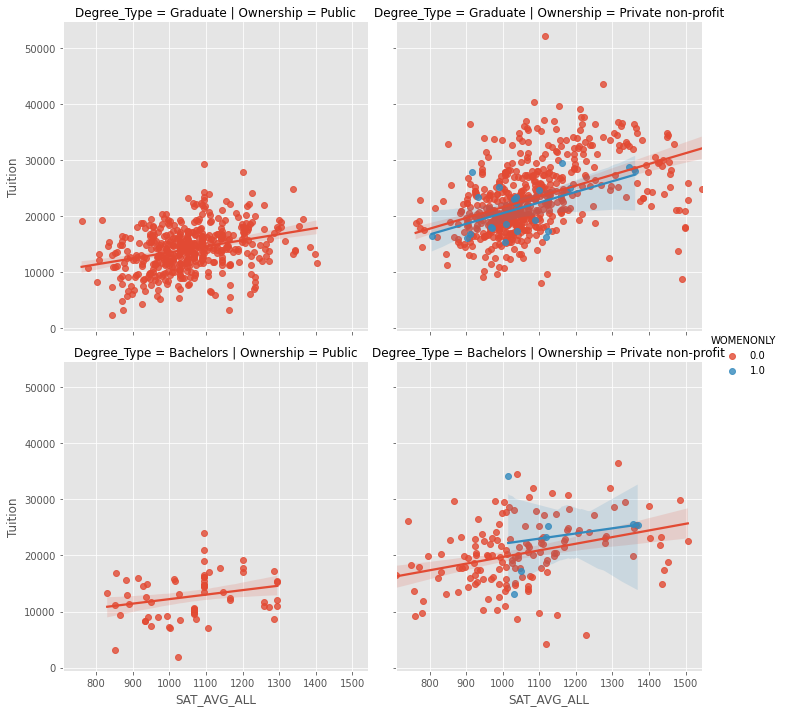

In [30]:
sns.lmplot(data=df, x='SAT_AVG_ALL', y='Tuition', col='Ownership', col_order=['Public', 'Private non-profit'], row='Degree_Type', row_order=['Graduate', 'Bachelors'],hue='WOMENONLY')
plt.show()